# **Galaxy Classification**

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Dataset

In [3]:
df = pd.read_csv("C:/Users/apmey/OneDrive/Desktop/star.csv")

# Exploratory Data Analysis

In [4]:
df.shape

(100000, 18)

There are 100,000 observations with 18 feature variables in the dataset

In [5]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


There are 18 variables, 1 discrete variable 16 continuous variables, and the object identification

In [6]:
col_names = df.columns
col_names

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

- obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
- alpha = Right Ascension angle (at J2000 epoch)
- delta = Declination angle (at J2000 epoch)
- u = Ultraviolet filter in the photometric system
- g = Green filter in the photometric system
- r = Red filter in the photometric system
- i = Near Infrared filter in the photometric system
- z = Infrared filter in the photometric system
- run_ID = Run Number used to identify the specific scan
- rereun_ID = Rerun Number to specify how the image was processed
- cam_col = Camera column to identify the scanline within the run
- field_ID = Field number to identify each field
- spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
- class = object class (galaxy, star or quasar object)
- redshift = redshift value based on the increase in wavelength
- plate = plate ID, identifies each plate in SDSS
- MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
- fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

In [7]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [8]:
df['class'].value_counts()/np.float(len(df))

GALAXY    0.59445
STAR      0.21594
QSO       0.18961
Name: class, dtype: float64

We can see the 59% of the observations are galaxies, 21% are stars and 19% are quasars.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

There are no missing values in the dataset

In [10]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


There apears to be outliers for the minimum values of u, g, and z. 

Boxplots to visualize the outliers

Text(0, 0.5, 'Fiber ID')

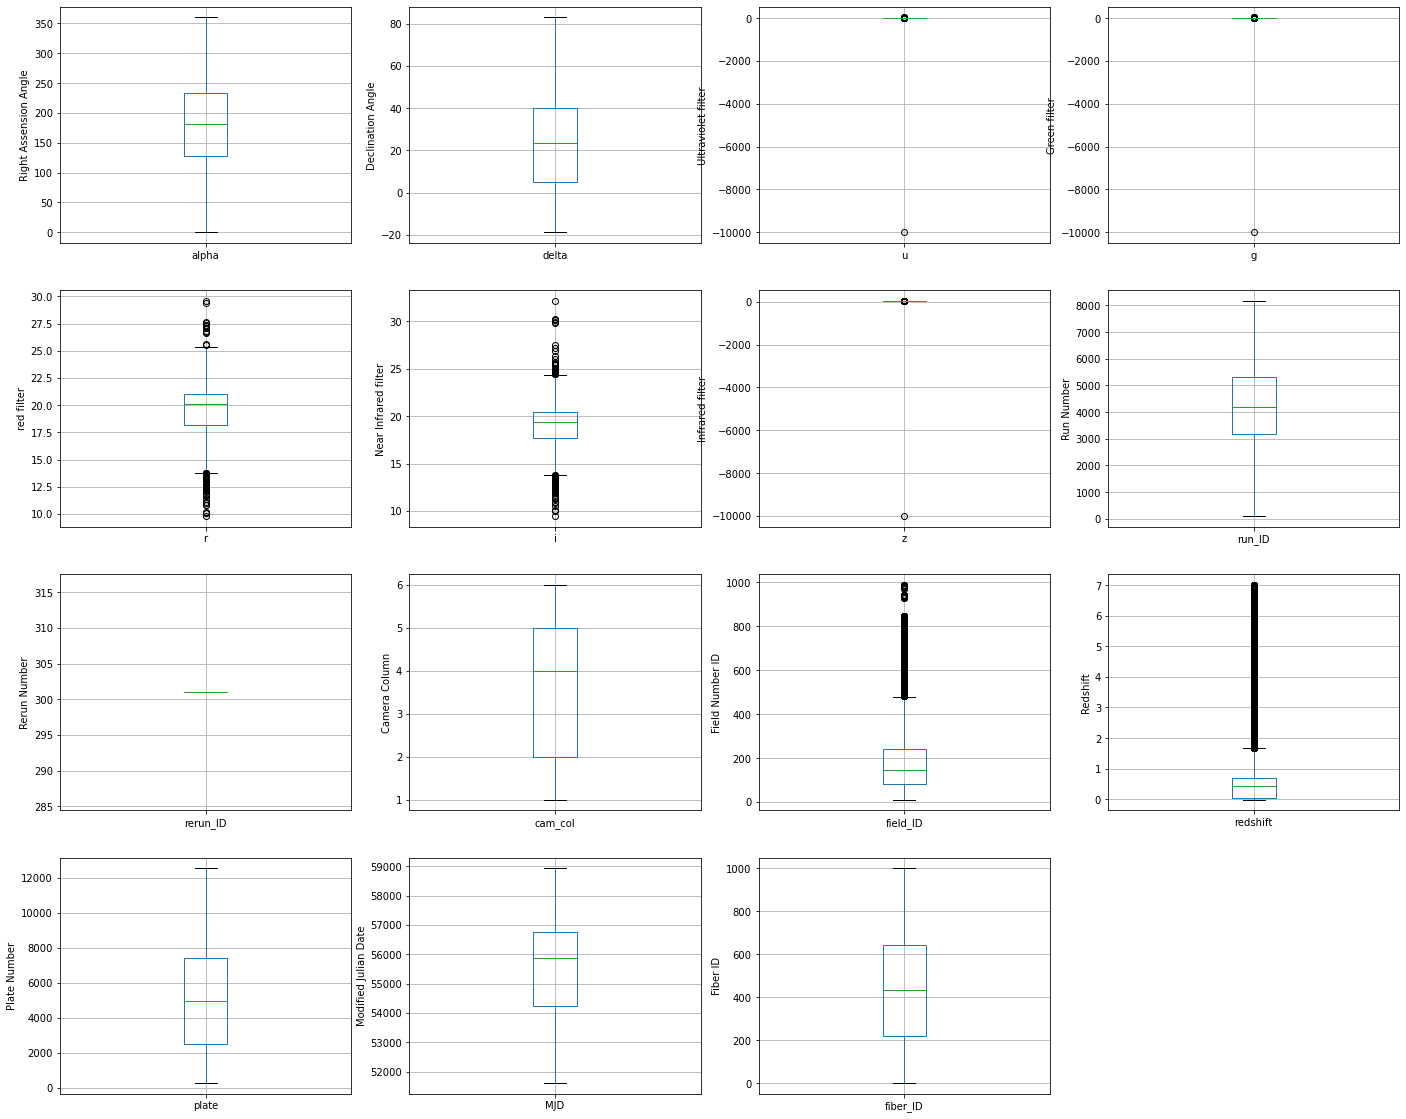

In [11]:
plt.figure(figsize=(24,20))

plt.subplot(4,4,1)
fig = df.boxplot(column = 'alpha')
fig.set_title('')
fig.set_ylabel('Right Assension Angle')

plt.subplot(4,4,2)
fig = df.boxplot(column = 'delta')
fig.set_title('')
fig.set_ylabel('Declination Angle')

plt.subplot(4,4,3)
fig = df.boxplot(column = 'u')
fig.set_title('')
fig.set_ylabel('Ultraviolet filter')

plt.subplot(4,4,4)
fig = df.boxplot(column = 'g')
fig.set_title('')
fig.set_ylabel('Green filter')

plt.subplot(4,4,5)
fig = df.boxplot(column = 'r')
fig.set_title('')
fig.set_ylabel('red filter')

plt.subplot(4,4,6)
fig = df.boxplot(column = 'i')
fig.set_title('')
fig.set_ylabel('Near Infrared filter')

plt.subplot(4,4,7)
fig = df.boxplot(column = 'z')
fig.set_title('')
fig.set_ylabel('Infrared filter')

plt.subplot(4,4,8)
fig = df.boxplot(column = 'run_ID')
fig.set_title('')
fig.set_ylabel('Run Number')

plt.subplot(4,4,9)
fig = df.boxplot(column = 'rerun_ID')
fig.set_title('')
fig.set_ylabel('Rerun Number')

plt.subplot(4,4,10)
fig = df.boxplot(column = 'cam_col')
fig.set_title('')
fig.set_ylabel('Camera Column')

plt.subplot(4,4,11)
fig = df.boxplot(column = 'field_ID')
fig.set_title('')
fig.set_ylabel('Field Number ID')

plt.subplot(4,4,12)
fig = df.boxplot(column = 'redshift')
fig.set_title('')
fig.set_ylabel('Redshift')

plt.subplot(4,4,13)
fig = df.boxplot(column = 'plate')
fig.set_title('')
fig.set_ylabel('Plate Number')

plt.subplot(4,4,14)
fig = df.boxplot(column = 'MJD')
fig.set_title('')
fig.set_ylabel('Modified Julian Date')

plt.subplot(4,4,15)
fig = df.boxplot(column = 'fiber_ID')
fig.set_title('')
fig.set_ylabel('Fiber ID')

The above boxplots confirm that there are a lot of outliers in these variables.
Therefore the value of C should be high when training the model.

Text(0, 0.5, 'Observations')

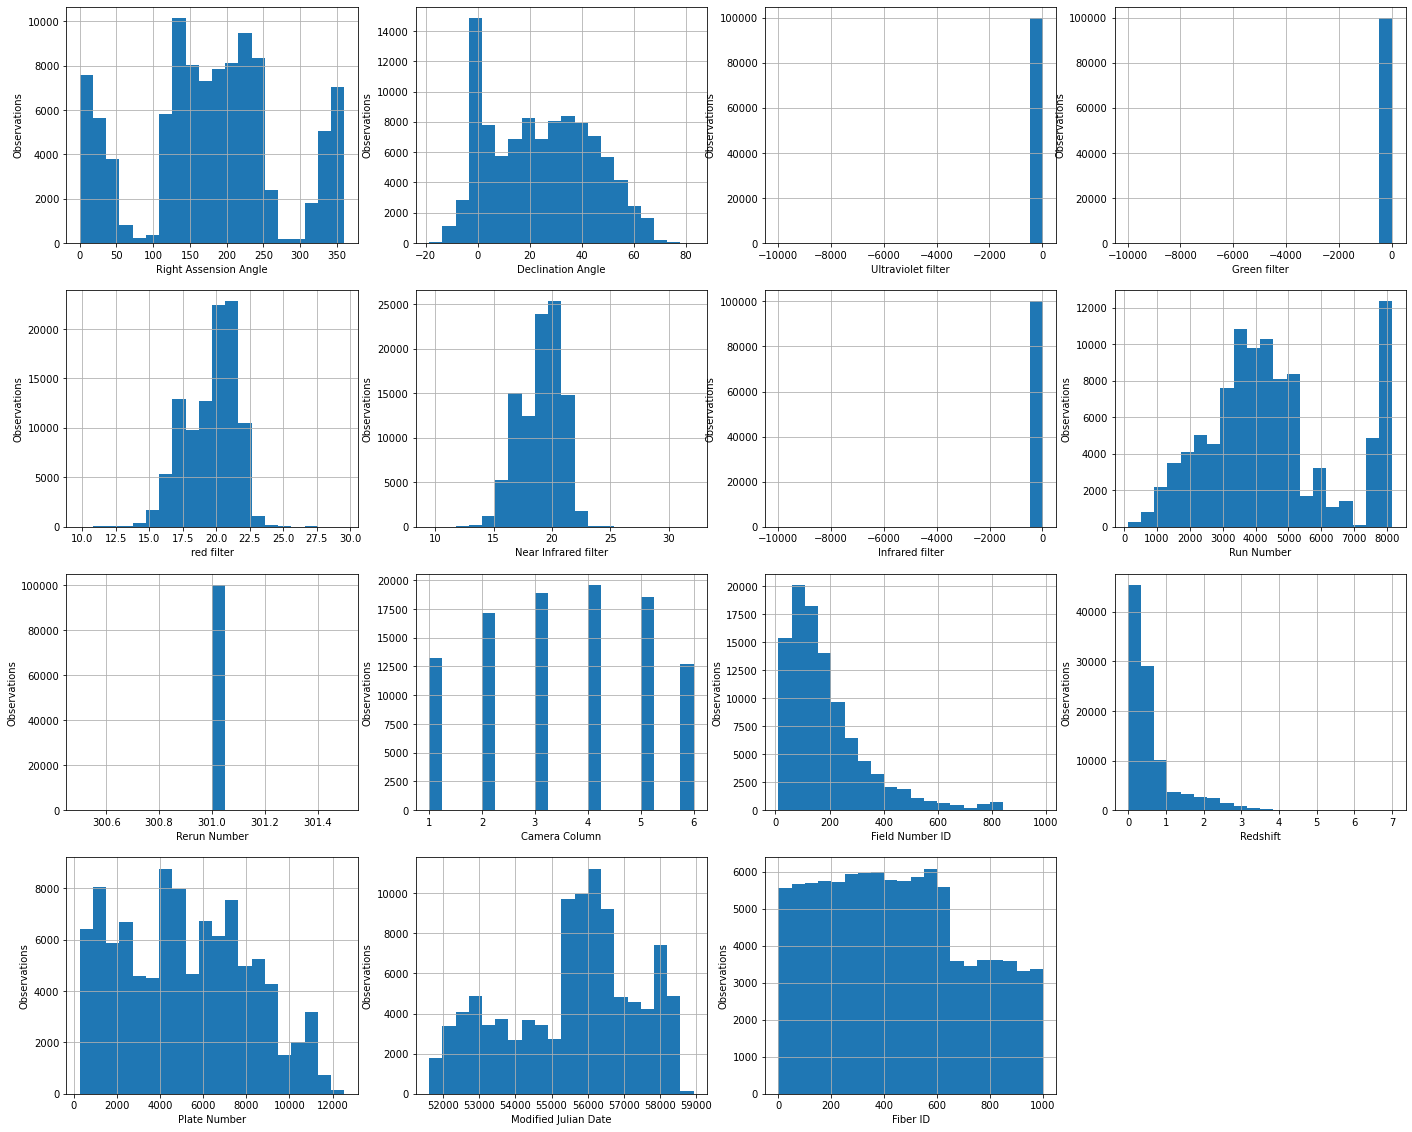

In [12]:
plt.figure(figsize=(24,20))

plt.subplot(4,4,1)
fig = df['alpha'].hist(bins = 20)
fig.set_xlabel('Right Assension Angle')
fig.set_ylabel('Observations')

plt.subplot(4,4,2)
fig = df['delta'].hist(bins = 20)
fig.set_xlabel('Declination Angle')
fig.set_ylabel('Observations')

plt.subplot(4,4,3)
fig = df['u'].hist(bins = 20)
fig.set_xlabel('Ultraviolet filter')
fig.set_ylabel('Observations')

plt.subplot(4,4,4)
fig = df['g'].hist(bins = 20)
fig.set_xlabel('Green filter')
fig.set_ylabel('Observations')

plt.subplot(4,4,5)
fig = df['r'].hist(bins = 20)
fig.set_xlabel('red filter')
fig.set_ylabel('Observations')

plt.subplot(4,4,6)
fig = df['i'].hist(bins = 20)
fig.set_xlabel('Near Infrared filter')
fig.set_ylabel('Observations')

plt.subplot(4,4,7)
fig = df['z'].hist(bins = 20)
fig.set_xlabel('Infrared filter')
fig.set_ylabel('Observations')

plt.subplot(4,4,8)
fig = df['run_ID'].hist(bins = 20)
fig.set_xlabel('Run Number')
fig.set_ylabel('Observations')

plt.subplot(4,4,9)
fig = df['rerun_ID'].hist(bins = 20)
fig.set_xlabel('Rerun Number')
fig.set_ylabel('Observations')

plt.subplot(4,4,10)
fig = df['cam_col'].hist(bins = 20)
fig.set_xlabel('Camera Column')
fig.set_ylabel('Observations')

plt.subplot(4,4,11)
fig = df['field_ID'].hist(bins = 20)
fig.set_xlabel('Field Number ID')
fig.set_ylabel('Observations')

plt.subplot(4,4,12)
fig = df['redshift'].hist(bins = 20)
fig.set_xlabel('Redshift')
fig.set_ylabel('Observations')

plt.subplot(4,4,13)
fig = df['plate'].hist(bins = 20)
fig.set_xlabel('Plate Number')
fig.set_ylabel('Observations')

plt.subplot(4,4,14)
fig = df['MJD'].hist(bins = 20)
fig.set_xlabel('Modified Julian Date')
fig.set_ylabel('Observations')

plt.subplot(4,4,15)
fig = df['fiber_ID'].hist(bins = 20)
fig.set_xlabel('Fiber ID')
fig.set_ylabel('Observations')

Field Number ID, Redshift, Ultraviolet filter, green filter, infrared filter are skewed. And others variables have irregular shapes. And there seems to be some outliers.

# Transformations

In [13]:
df['class'].value_counts()/np.float(len(df))

GALAXY    0.59445
STAR      0.21594
QSO       0.18961
Name: class, dtype: float64

Set Galaxy to 1 and 0 for everything else

In [14]:
df['class'] = df['class'].apply(lambda x: 1 if x == 'GALAXY' else 0)

In [15]:
df['class'].value_counts()/np.float(len(df))

1    0.59445
0    0.40555
Name: class, dtype: float64

In [16]:
X = df.drop(['class'], axis = 1)
y = df['class']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 0)

In [18]:
X_train.shape, X_test.shape

((80000, 17), (20000, 17))

## Scaling

In [19]:
cols = X_train.columns

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [21]:
X_train = pd.DataFrame(X_train, columns = [cols])

X_test = pd.DataFrame(X_test, columns = [cols])

In [22]:
X_train.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,80000.0,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04
mean,3.207672e-12,-3.678093e-16,1.520485e-16,1.734671e-17,2.797337e-17,-7.402981e-16,3.094303e-16,-8.189283e-18,1.173064e-16,0.0,1.053610e-15,-1.543210e-17,1.168093e-17,1.069035e-16,-7.823464e-17,3.483828e-16,1.176920e-16
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,0.0,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-2.225570e+00,-1.843046e+00,-2.182568e+00,-2.822717e+02,-2.823748e+02,-5.301893e+00,-5.473293e+00,-2.824910e+02,-2.225591e+00,0.0,-1.577014e+00,-1.170981e+00,-1.646374e+00,-7.978911e-01,-1.646354e+00,-2.196600e+00,-1.645009e+00
25%,-6.571106e-01,-5.194883e-01,-9.668073e-01,-4.542523e-02,-4.352486e-02,-8.133885e-01,-7.693246e-01,-3.336429e-02,-6.572017e-01,0.0,-9.480667e-01,-6.959198e-01,-8.827719e-01,-7.129119e-01,-8.827457e-01,-7.465064e-01,-8.378715e-01
50%,-1.450224e-01,3.624997e-02,-2.471107e-02,6.384004e-03,1.659222e-02,2.568810e-01,1.788216e-01,1.008464e-02,-1.451160e-01,0.0,3.098271e-01,-2.676955e-01,-5.074690e-02,-2.108057e-01,-5.073380e-02,1.564861e-01,-6.375369e-02
75%,4.338823e-01,5.833773e-01,8.031926e-01,4.878944e-02,4.561885e-02,7.544361e-01,7.462723e-01,3.598737e-02,4.337855e-01,0.0,9.387741e-01,3.612590e-01,7.670874e-01,1.740020e-01,7.670557e-01,6.571662e-01,7.177017e-01
max,1.881972e+00,1.893246e+00,2.993686e+00,2.451205e-01,3.126876e-01,5.357537e+00,7.433879e+00,2.861655e-01,1.881805e+00,0.0,1.567721e+00,5.372822e+00,2.512382e+00,8.802680e+00,2.512350e+00,1.850841e+00,2.020127e+00


# **SVM Modeling**

### Default of C = 1.0, kernal = rbf, gamma = auto

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

The model with rbf kernal and c of 1.0 has an accuracy of about 79%

### rbf kernal and C = 10.0

In [ ]:
svc = SVC(C = 10.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

The model with rbf kernal and c of 1.0 has an accuracy of about 85.73%

### rbf kernal and C = 100.0

In [ ]:
svc = SVC(C=100.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

Accuracy increased when C increase from 1 to 100 to 85.57%

### rbf kernal and C = 1000.0

In [ ]:
svc = SVC(C=1000.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

Increasing the C value to 1000 decreased the accuracy with the rbf kernal to 75%

### linear kernal and C = 1.0

In [ ]:
svc_linear = SVC(C=1.0, kernel = 'linear')
svc_linear.fit(X_train, y_train)
y_pred = svc_linear.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

The model with linear kernal and c of 1.0 has an accuracy of 71%

### linear kernal and C = 10.0

In [ ]:
svc_linear = SVC(C=10.0, kernel = 'linear')
svc_linear.fit(X_train, y_train)
y_pred = svc_linear.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

The model with linear kernal and c of 10.0 has an accuracy of 70%

### linear kernal and C = 100.0

In [ ]:
svc_linear = SVC(C=100.0, kernel = 'linear')
svc_linear.fit(X_train, y_train)
y_pred = svc_linear.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

The model with linear kernal and c of 10.0 has an accuracy of 70%

### linear kernal and C = 1000.0

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_linear = SVC(C=1000.0, kernel = 'linear')
svc_linear.fit(X_train, y_train)
y_pred = svc_linear.predict(X_test)
print('Model Accuarcy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
clf = LinearSVC(random_state=0, tol=1e-5, C=1000.0)
clf.fit(X_train, y_train.ravel()) 
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

The model with linear kernal and c of 1000.0 has an accuracy of about 61%

### Poly kernal, c = 1.0

In [ ]:
svc_poly = SVC(C=1.0, kernel = 'poly')
svc_poly.fit(X_train, y_train)
y_pred = svc_poly.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

The model with polynominal kernal and c of 1.0 has an accuracy of about 73%

### Poly kernal, c = 10.0

In [ ]:
svc_poly = SVC(C=10.0, kernel = 'poly')
svc_poly.fit(X_train, y_train)
y_pred = svc_poly.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

The model with polynominal kernal and c of 10.0 has an accuracy of 74%

### Poly kernal, c = 100.0

In [ ]:
svc_poly = SVC(C=100.0, kernel = 'poly')
svc_poly.fit(X_train, y_train)
y_pred = svc_poly.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

The model with polynominal kernal and c of 100.0 has an accuracy of about 76%

### Poly kernal, c = 1000.0

In [ ]:
svc_poly = SVC(C=1000.0, kernel = 'poly')
svc_poly.fit(X_train, y_train)
y_pred = svc_poly.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

The model with polynominal kernal and c of 1000.0 has an accuracy of about 79%

# Best model found

In [24]:
svc = SVC(C=50.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.86015

The model accuracy is 86%

## Compare training and testing accuracy

In [25]:
y_pred_train = svc.predict(X_train)

y_pred_train

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [26]:
train_acc_score = accuracy_score(y_train, y_pred_train)
train_acc_score

0.9650625

The Training-set accuracy is 96%. We can see the the best model predicts the training set well and predicts it about 10% better than the testing set.

### Overfitting and Underfitting

In [28]:
training_score = svc.score(X_train, y_train)

testing_score = svc.score(X_test, y_test)
training_score
testing_score

0.86015

The training set accuracy is higher for the training set (96%) compared to the testing set (86%), so there is some overfitting within the model.

## Compare model accuracy and null accuracy

In [29]:
y_test.value_counts()

1    11851
0     8149
Name: class, dtype: int64

In [30]:
null_accuracy = (11851/(11851+8149))
null_accuracy

0.59255

The model accuracy is 86%, while the null accuracy is 59%. So we can conclude that our SVM classifier is doing a great job predicting if the object is a galaxy or not.

## Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

In [32]:
y_test.value_counts()

1    11851
0     8149
Name: class, dtype: int64

<AxesSubplot:>

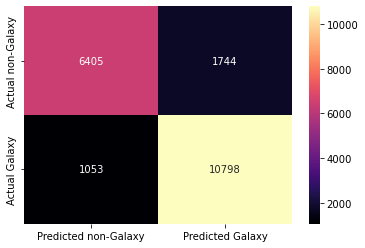

In [33]:
confusion_matrix = pd.DataFrame(conf_matrix, columns=['Predicted non-Galaxy', 'Predicted Galaxy'], 
                                 index=['Actual non-Galaxy', 'Actual Galaxy'])

sns.heatmap(confusion_matrix, annot= True, fmt = 'd', cmap = 'magma')

In [34]:
TP = conf_matrix[1,1]
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

accuracy = (TP + TN) / float(TP + TN + FP + FN)

accuracy

0.86015

Model Accuracy is 86%

### True Positve Rate

In [35]:
tp_rate = TP / (TP+FN)
tp_rate

0.911146738671842

True Positive Rate is 91%

### False Positive Rate

In [36]:
fp_rate = FP / (FP + TN)
fp_rate

0.21401398944655786

False Positive rate is 21%

### ROC Curve

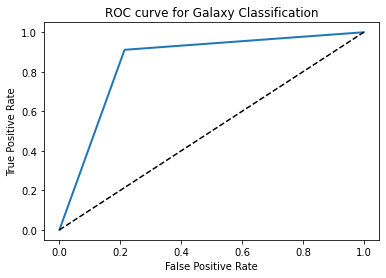

In [37]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.title('ROC curve for Galaxy Classification')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()

In [38]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
roc_auc

0.8485663746126421

We have a ROC AUC of 0.84, meaning that 84% of the ROC is under the curve. This is close to 1 (1 meaning a perfect fit). So this does a good job classifing galaxies. 

## Conclusion

- Our best model comes from the rbf kernel with C = 50.0 and the accuacy is 86%
- Our ROC AUC from the model is .84 which is close to 1 so we can conclude that our classifier does a good job classifing galaxies